# 学习曲线

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1,1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0,1,size=100)

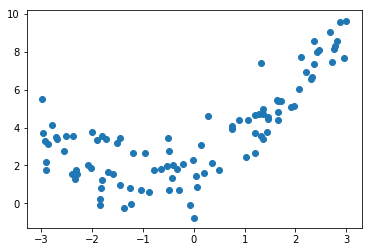

In [3]:
plt.scatter(x,y)
plt.show()

In [4]:
from sklearn.model_selection._split import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=10)

In [5]:
X_train.shape

(75, 1)

In [6]:
# 慢慢增加训练的样本数，看看"对训练数据集的预测结果"以及"对测试数据集的预测结果"的变化

from sklearn.linear_model.base import LinearRegression
from sklearn.metrics.scorer import mean_squared_error

train_score = []    # 对训练数据集的预测结果(每一次增加样本后的结果均方误差)
test_score = []     # 对测试数据集的预测结果(每一次增加样本后的结果均方误差)
for i in range(1,76):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train[:i], y_train[:i])
    
    y_train_predict = lin_reg.predict(X_train[:i])
    train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    
    y_test_predict = lin_reg.predict(X_test)
    test_score.append(mean_squared_error(y_test, y_test_predict))

/usr/local/seamonster/MachineLearningClassicAlgorithmEnv/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


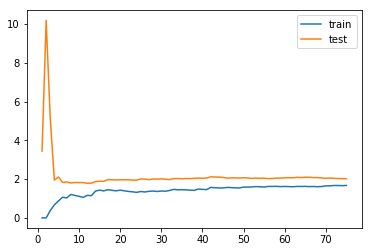

In [8]:
# 开根号只是为了让数目小一些，方便观察
plt.plot([i for i in range(1,76)], np.sqrt(train_score), label='train')
plt.plot([i for i in range(1,76)], np.sqrt(test_score), label='test')
plt.legend()
plt.show()

上图就是学习曲线

### 把"画学习曲线"提炼成一个函数，以便调用

In [9]:
def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    """
    绘制学习曲线
    :param algo: 要使用的机器学习算法模型，例如LinearRegression的实例
    :param X_train: 
    :param X_test: 
    :param y_train: 
    :param y_test: 
    :return: 
    """
    train_score = []    # 对训练数据集的预测结果(每一次增加样本后的结果均方误差)
    test_score = []     # 对测试数据集的预测结果(每一次增加样本后的结果均方误差)
    for i in range(1, len(X_train) + 1):
        algo.fit(X_train[:i], y_train[:i])
        
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i],y_train_predict))
        
        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))
    plt.plot([i for i in range(1,len(X_train) + 1)], np.sqrt(train_score), label='train')
    plt.plot([i for i in range(1,len(X_train) + 1)], np.sqrt(test_score), label='test')
    plt.legend()
    plt.axis([0, len(X_train) + 1, 0, 4])
    plt.show()

## 线性回归模型的学习曲线

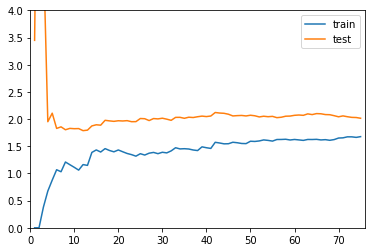

In [10]:
# 绘制一下线性回归模型的学习曲线
plot_learning_curve(LinearRegression(), X_train, X_test, y_train, y_test)

## 多项式回归模型的学习曲线

### 2阶多项式回归

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing.data import PolynomialFeatures
from sklearn.preprocessing.data import StandardScaler

def PolynomialRegression(degree):
    return Pipeline(
        [
            ('poly', PolynomialFeatures(degree=degree)),
            ('std_scaler', StandardScaler()),
            ('lin_reg',LinearRegression())
        ]
    )

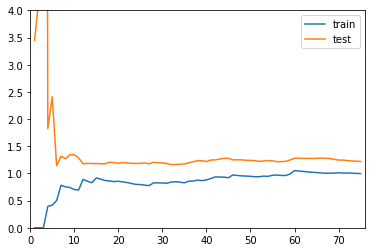

In [12]:
poly2_reg = PolynomialRegression(degree=2)
plot_learning_curve(poly2_reg, X_train, X_test, y_train, y_test)

与线性回归的学习曲线图相比，此图两条曲线的稳定点比较低，大概1.0左右，而线性回归是1.5以上。这说明使用2阶多项式回归，拟合效果比线性回归好

### 20阶多项式回归

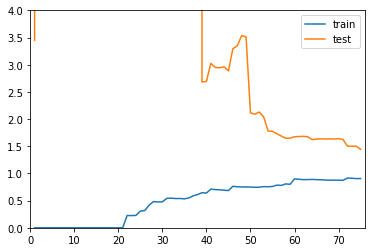

In [14]:
poly20_reg = PolynomialRegression(degree=20)
plot_learning_curve(poly20_reg, X_train, X_test, y_train, y_test)

训练集的曲线平缓的部分（就是已经拟合得比较好了），测试集的曲线离训练集的曲线比较远，这种情况一般就是过拟合

## 总结

对比欠拟合，最佳，过拟合3种情况
- 欠拟合，与最佳的相比，两条曲线趋于的位置（误差）比最佳的位置（误差）要高一些
- 过拟合，与最佳的相比，训练集的误差都是差不多的，甚至比最佳的还要低一些。但是测试集的曲线离训练集的曲线会更远